# 1. Импорт библиотек

In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.style.use('seaborn-v0_8')

# 2. Загрузка данных и первичный осмотр

In [11]:
df = pd.read_csv('../data/bank-additional-full.csv', sep=';')

In [12]:
# Первые 5 строк
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
# Название признаков
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Анализ целевой переменной

<Axes: ylabel='count'>

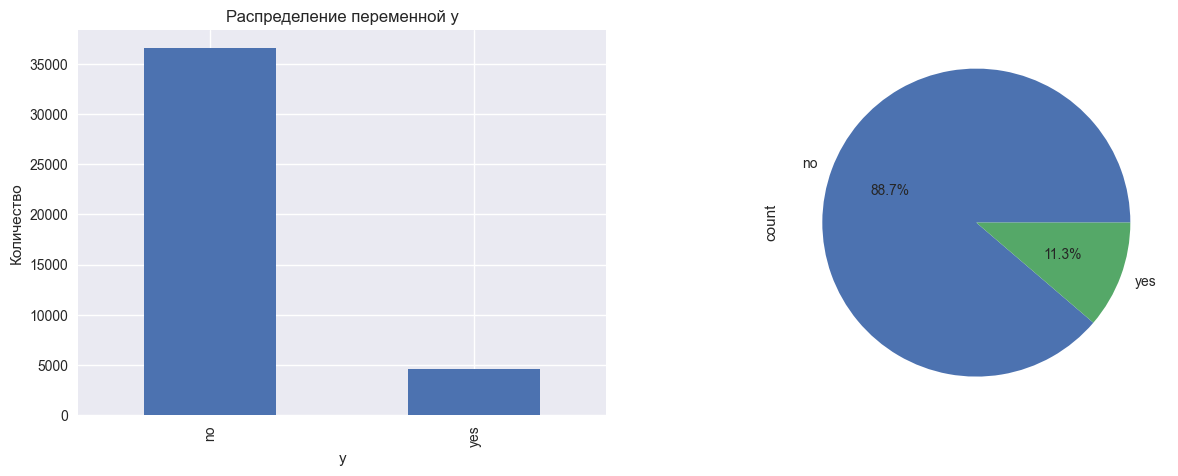

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df['y'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение переменной y')
axes[0].set_xlabel('y')
axes[0].set_ylabel('Количество')

df['y'].value_counts().plot(kind='pie', autopct='%1.1f%%')

#В данном датасете присутствует дисбаланс классов

# 4. Анализ числовых признаков

In [17]:
# Cписок числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

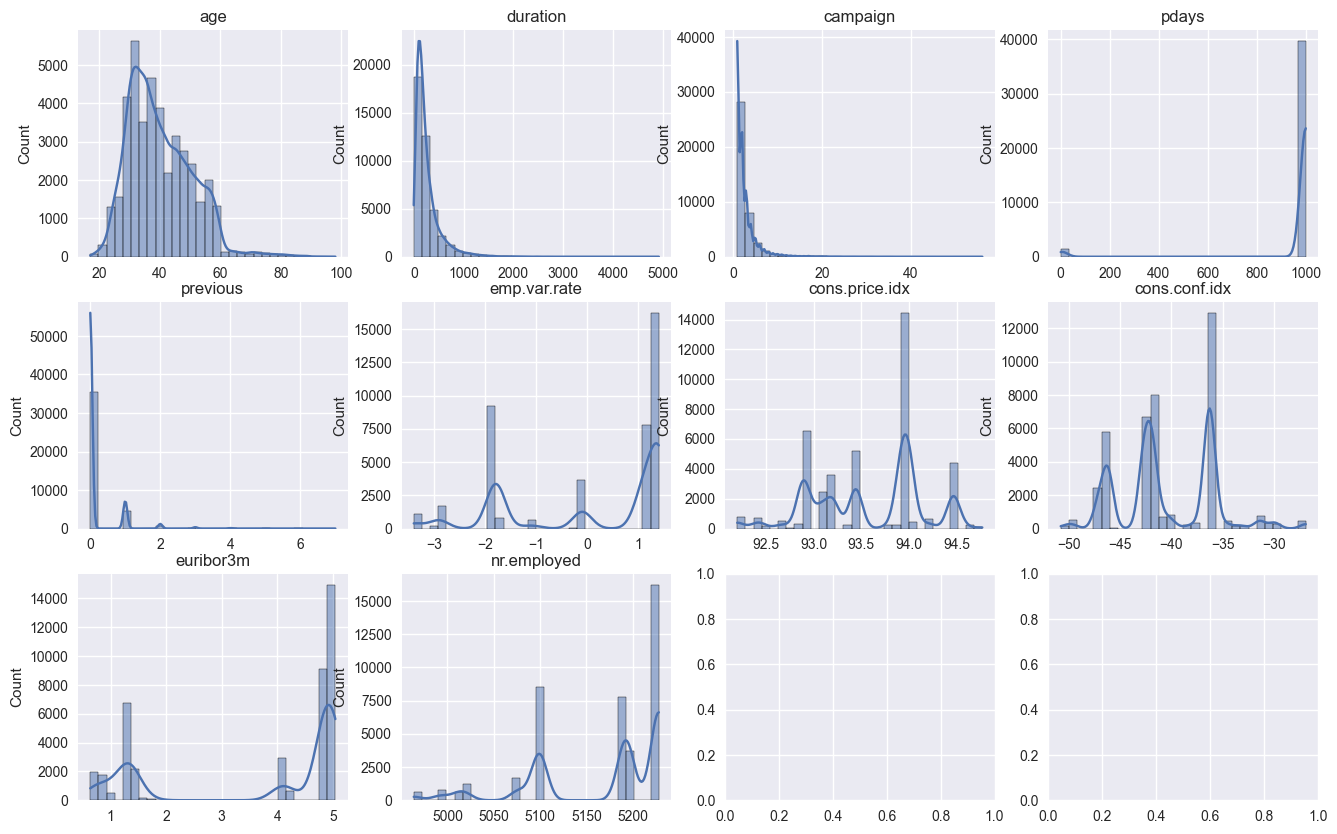

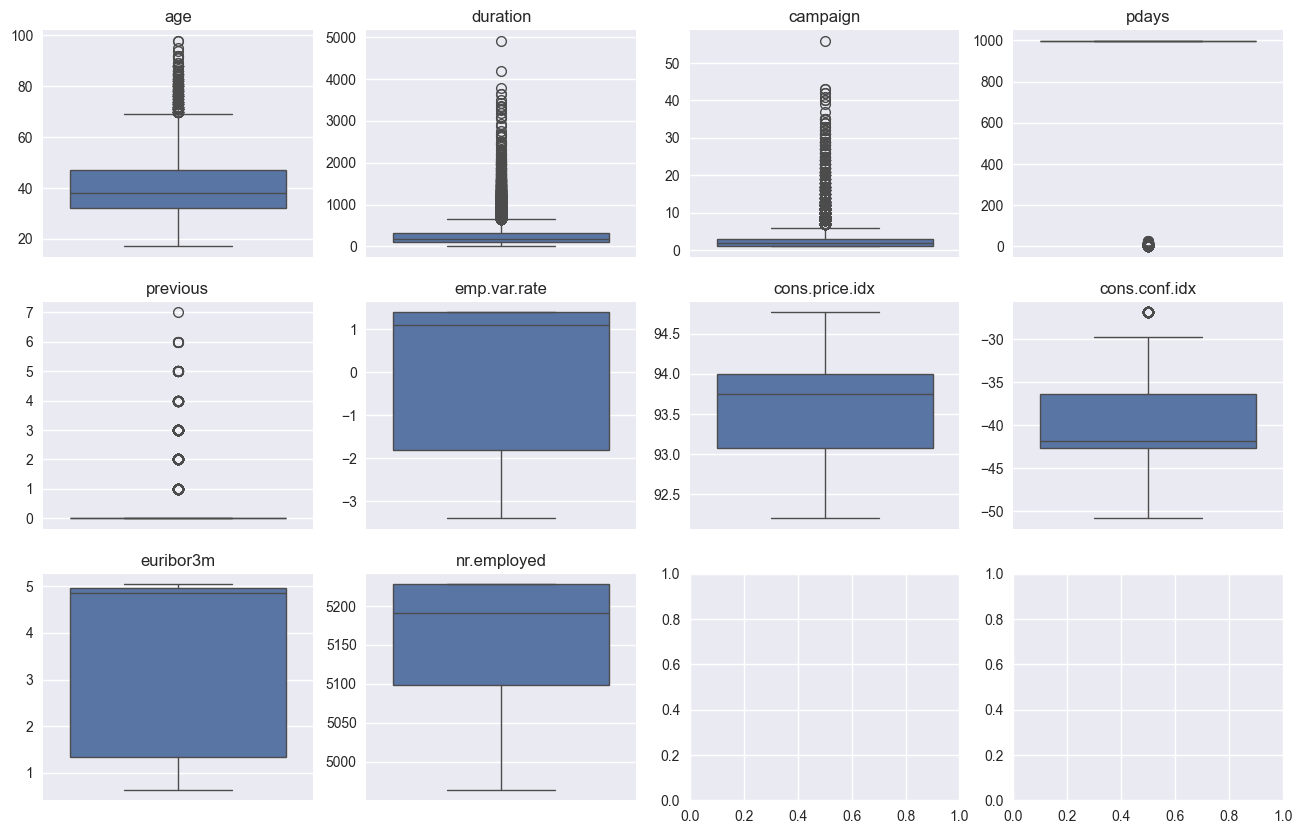

In [18]:
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('')


# 5. Распределение категориальных переменных

In [31]:
# Все категориальные признаки
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

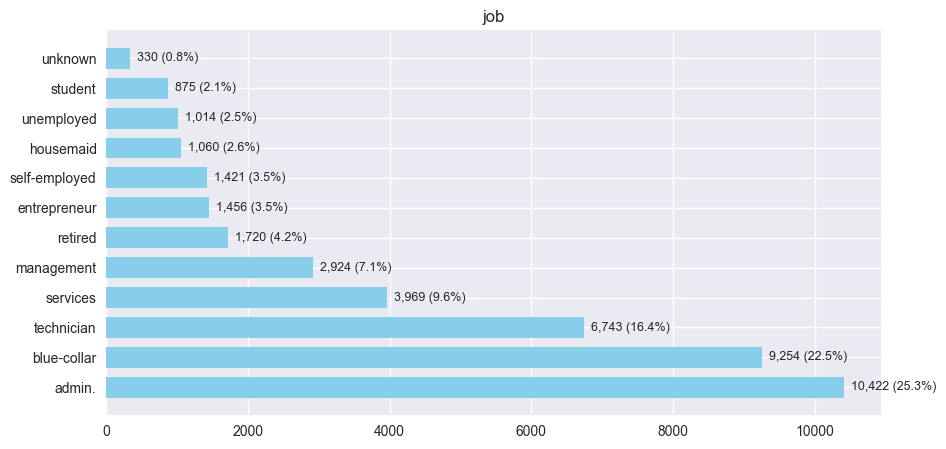

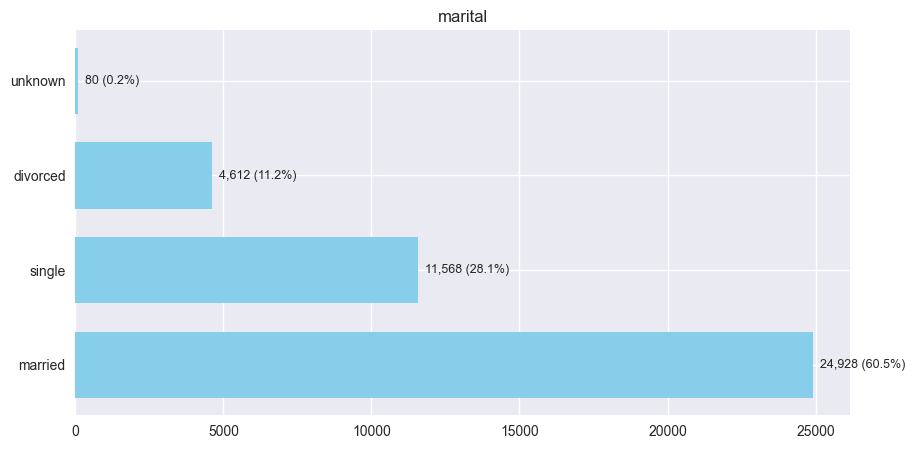

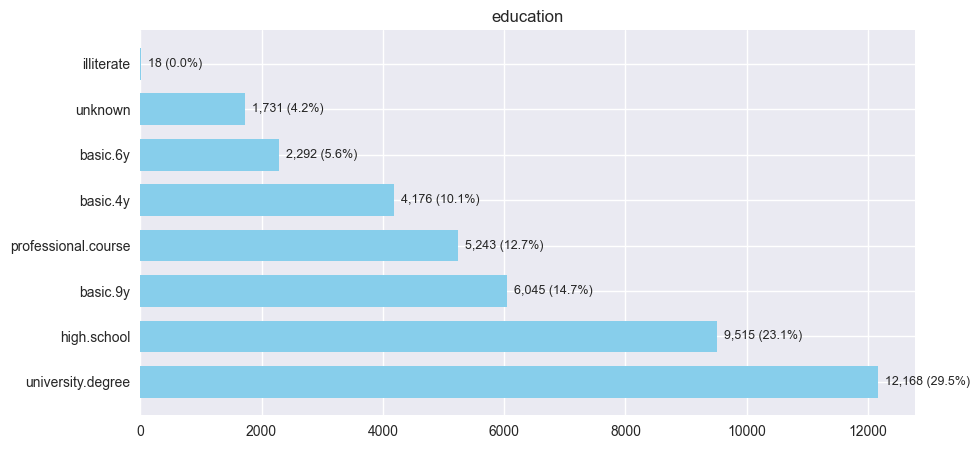

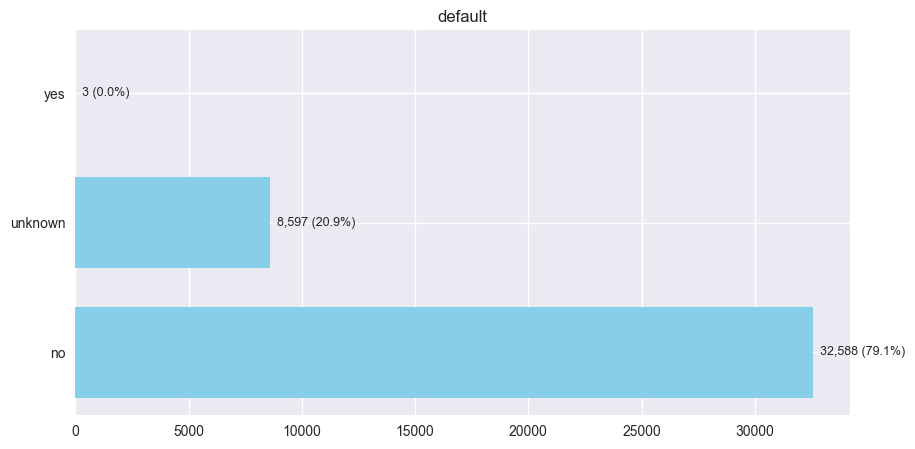

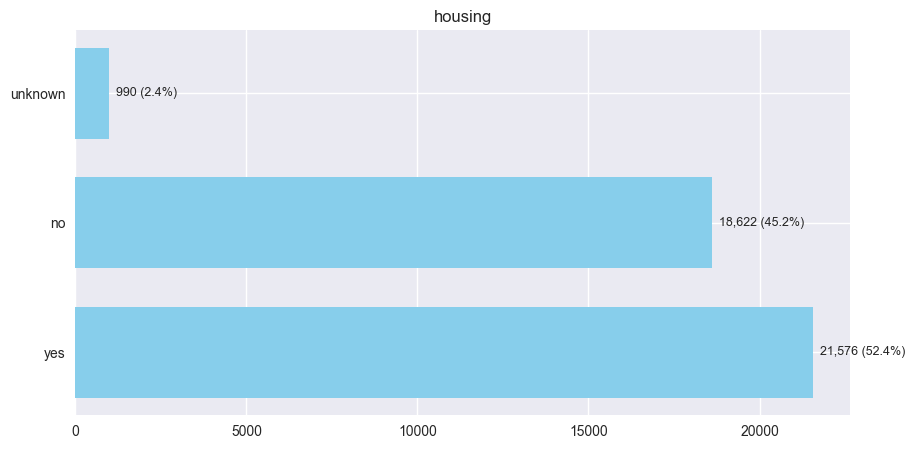

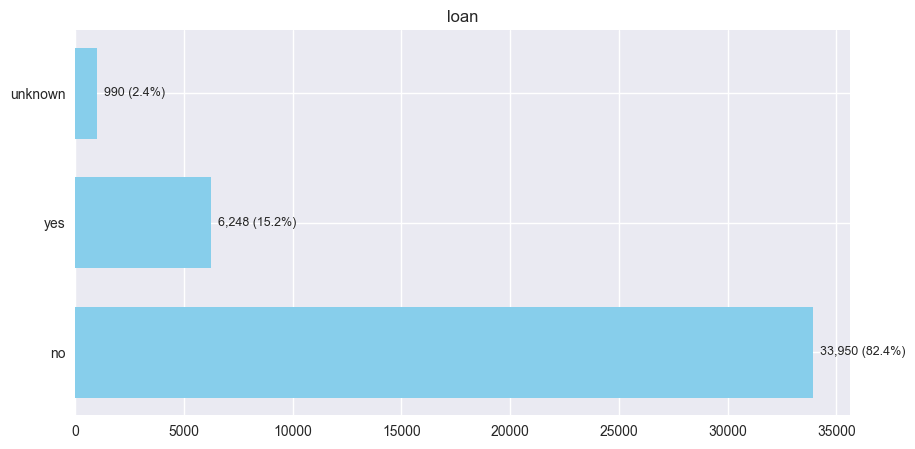

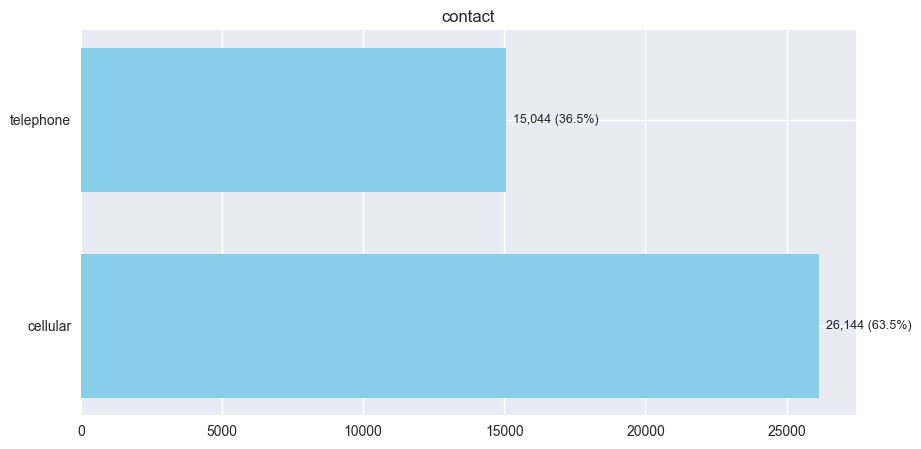

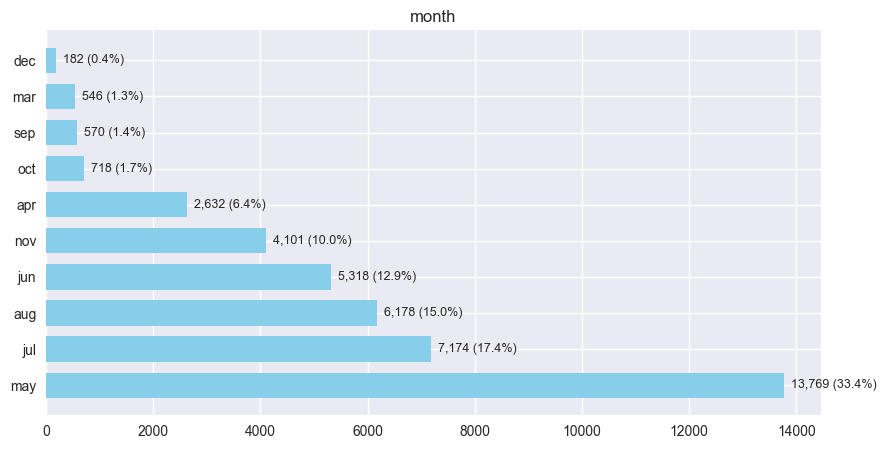

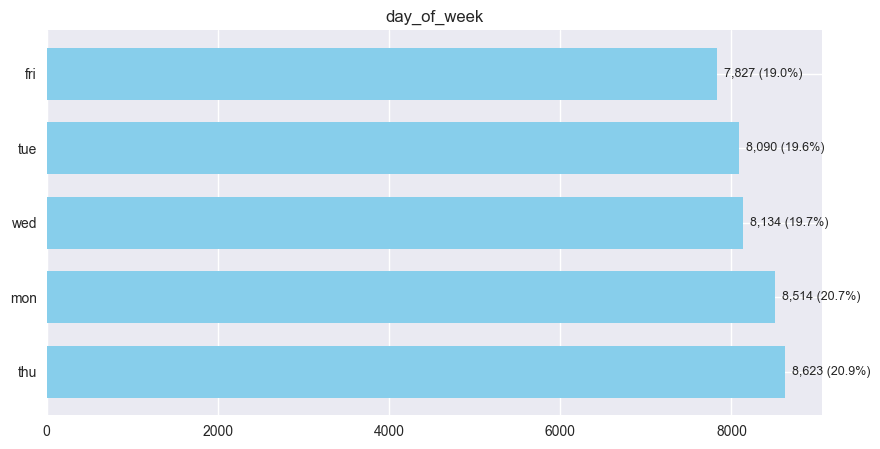

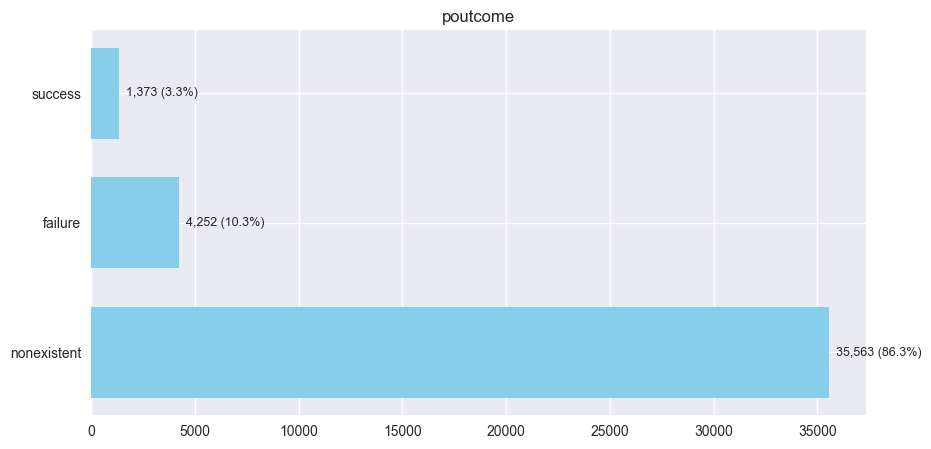

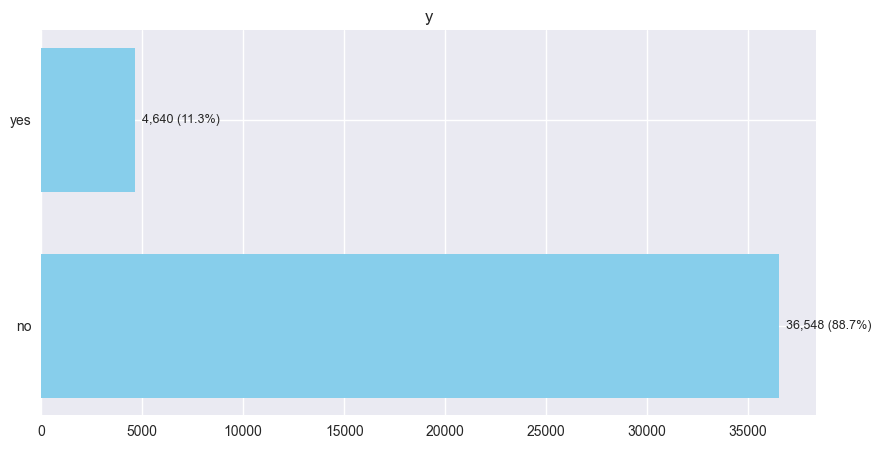

In [32]:
for col in cat_cols:
    value_counts = df[col].value_counts()
    total = len(df)
    
    plt.figure(figsize=(10, max(5, len(value_counts) * 0.3)))
    bars = plt.barh(value_counts.index, value_counts.values, 
                   color='skyblue', height=0.7)
    
    # Добавляем и число, и процент
    for bar, value in zip(bars, value_counts.values):
        percentage = (value / total) * 100
        plt.text(value, bar.get_y() + bar.get_height()/2, 
                f'  {value:,} ({percentage:.1f}%)', 
                va='center', fontsize=9)
    plt.title(col)

# 4. Анализ взаимосвязей

## Матрица корреляции признаков

<Axes: >

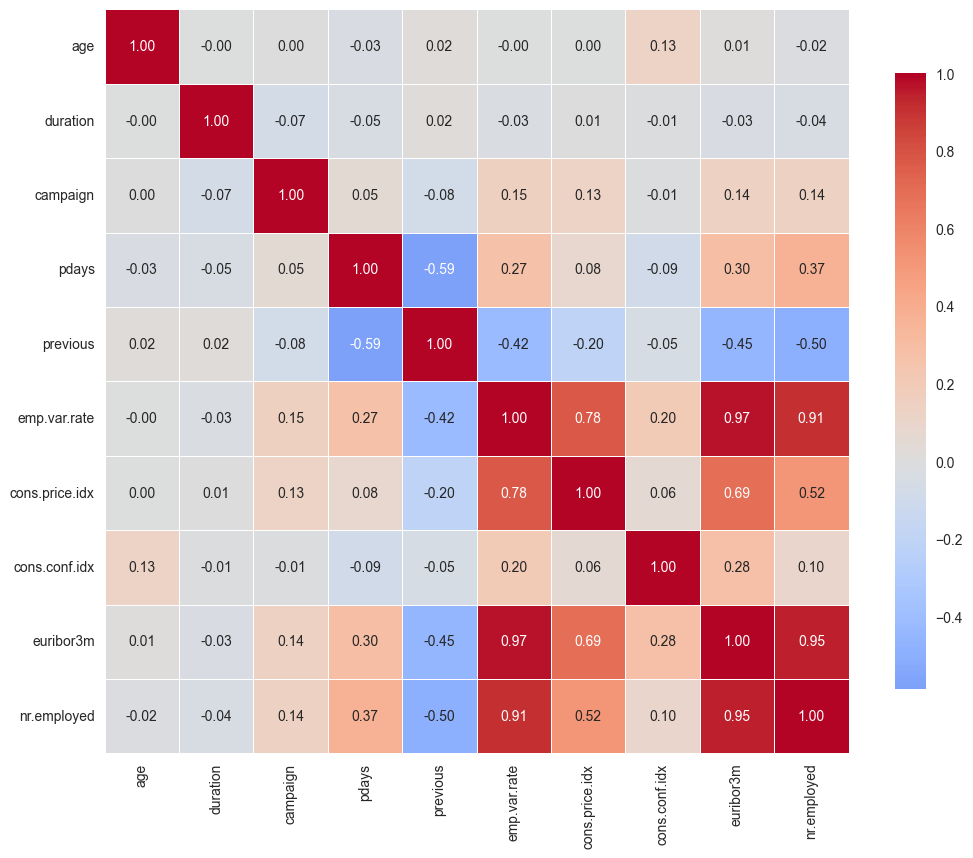

In [22]:
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', 
                cmap='coolwarm', center=0, square=True,
                linewidths=0.5, cbar_kws={"shrink": 0.8})

## Свзяь категориальных с целевой переменной

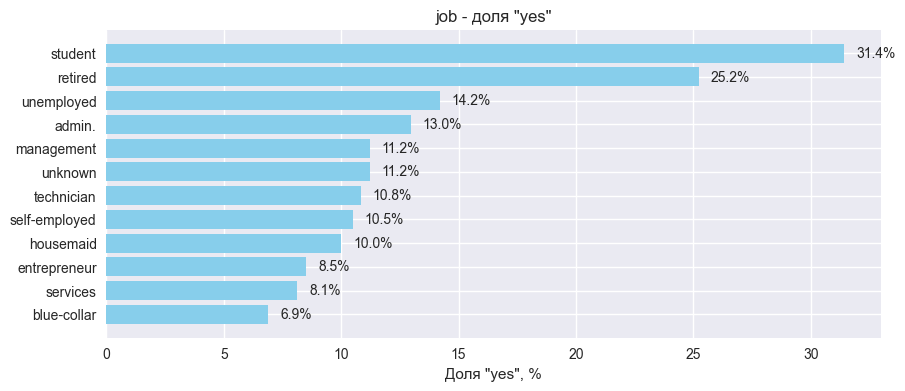

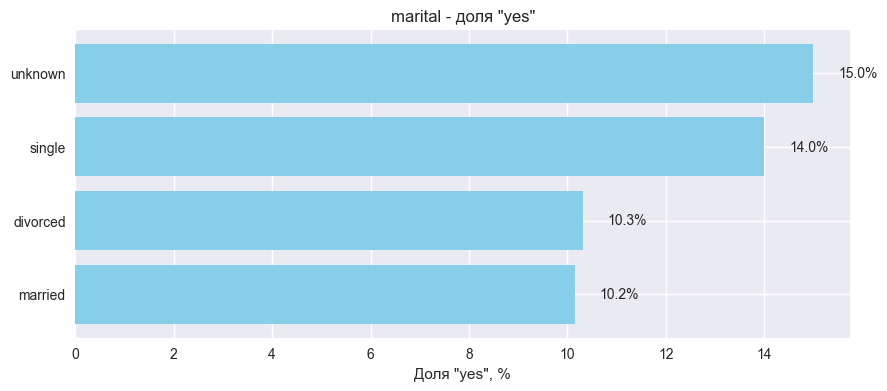

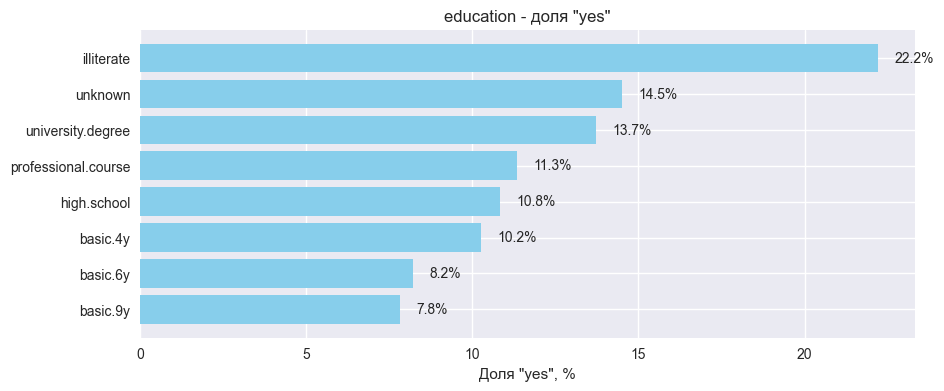

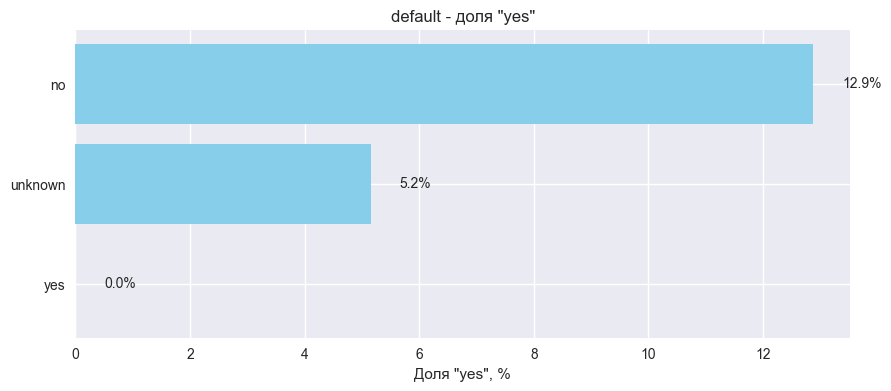

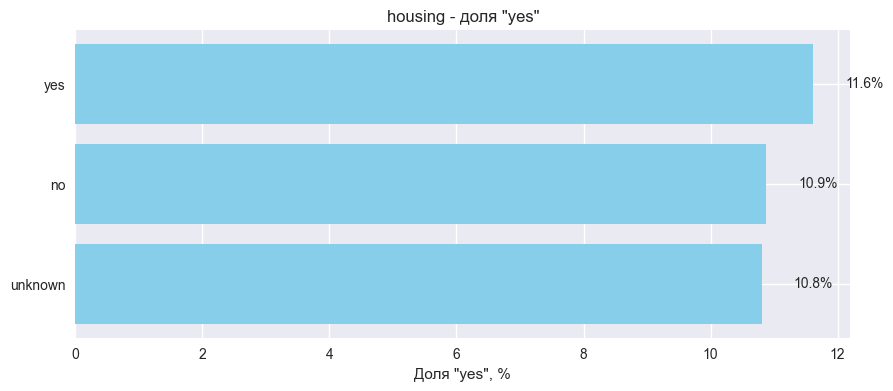

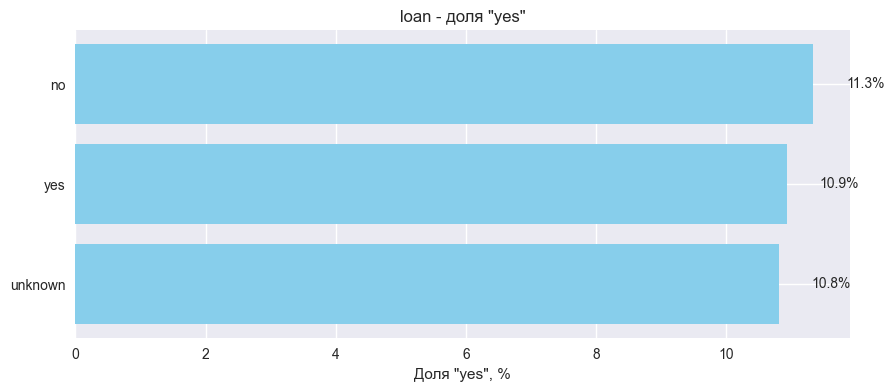

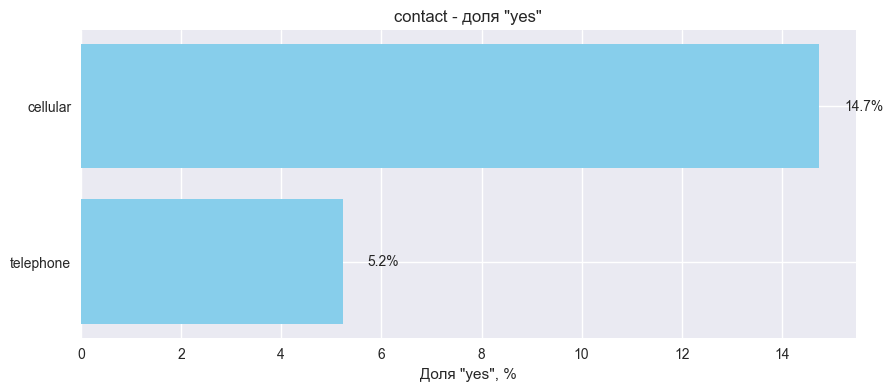

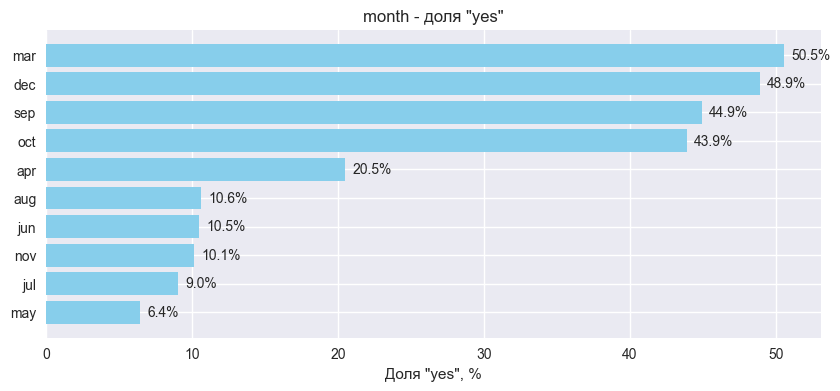

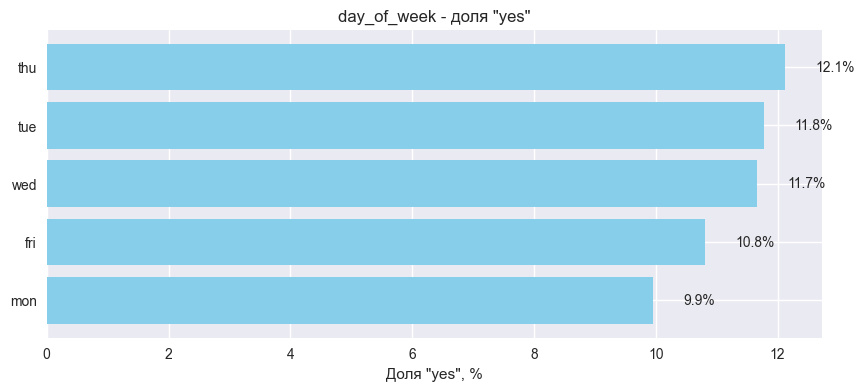

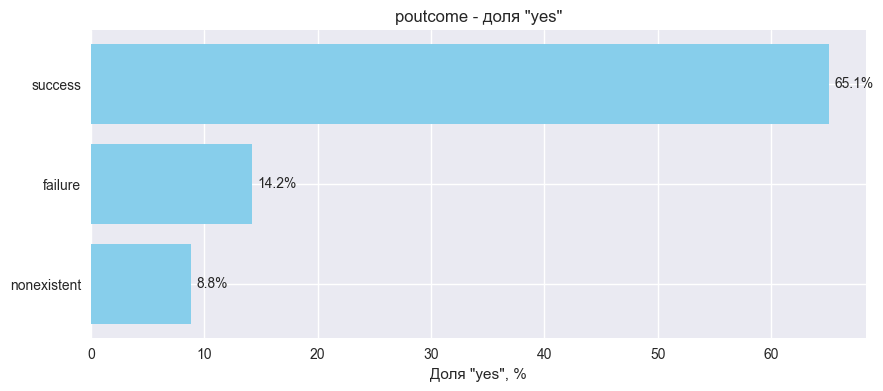

In [33]:
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})

for col in cat_cols:
    if col != 'y' and df[col].nunique() <= 15:
        result = df.groupby(col)['y_num'].mean().sort_values(ascending=True)

        plt.figure(figsize=(10, max(4, len(result) * 0.3)))
        plt.barh(result.index.astype(str), result.values * 100, color='skyblue')
        
        for i, (cat, rate) in enumerate(result.items()):
            plt.text(rate * 100 + 0.5, i, f'{rate:.1%}', va='center')
        
        plt.title(f'{col} - доля "yes"')
        plt.xlabel('Доля "yes", %')

## Свзяь числовых с целевой переменной

Text(0.5, 1.02, 'Распределение числовых признаков c целевой переменной')

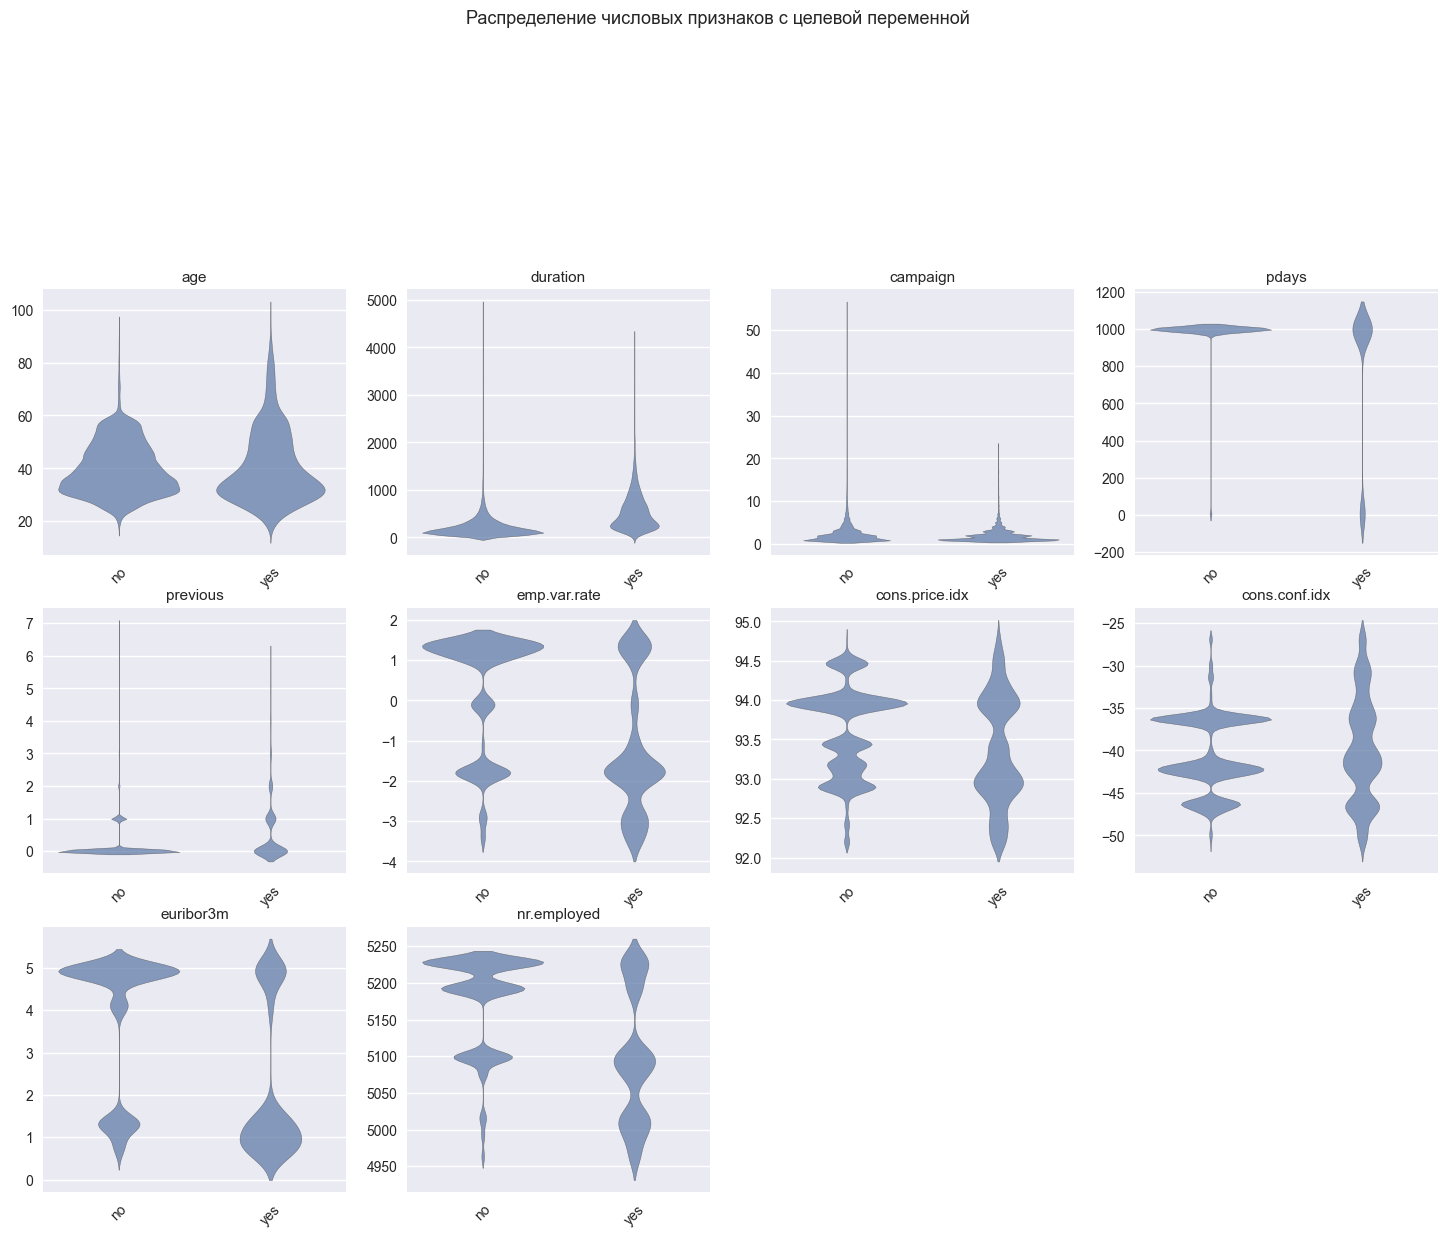

In [28]:
fig, axes = plt.subplots(5, 4, figsize=(18,  20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        sns.violinplot(x='y', y=col, data=df, 
                      ax=axes[i],
                      inner=None,
                      alpha=0.7)
        
        axes[i].set_title(col, fontsize=11)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        
        # Поворачиваем подписи если нужно
        axes[i].tick_params(axis='x', rotation=45)

# Скрываем пустые оси
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Распределение числовых признаков c целевой переменной', fontsize=13, y=1.02)